<a href="https://colab.research.google.com/github/eroali/DeepLearning/blob/main/DL_Module_2_File_1_(Assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Module 2 File 1 (Assignment)

Tasks to be performed:

Note: Please refer to the Demo file (Classifying Handwritten Digits from Tensorflow 2.x) of
Module 2

.docx file 1: Create a Word File and answer the following tasks

Marks: 10

        Do you get the exact same results if you run the Notebook multiple times without changing any parameters?
        What is the effect of adding more neurons to each hidden layer?
        What happens if we manipulate the value of dropout?
        What is the effect of adding more hidden layer to the network?
        What is the accuracy score if we use RMSprop for model 6?
        Does manipulating the learning rate affect the model? Justify your answer.
        What is the best parameter configuration for this project?



#### Q1: Do you get the exact same results if you run the Notebook multiple times without changing any parameters?

In [ ]:
# Do you get the exact same results if you run the Notebook multiple times without changing any parameters?

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
# Loading MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
28*28

784

In [ ]:
#X_train[0] # pixel values between 0 to 255, but outline of 5 is visible

In [ ]:
y_train[0]

5

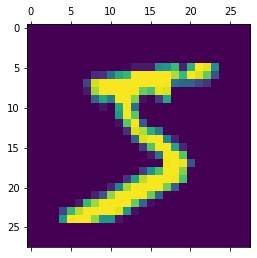

In [ ]:
plt.matshow(X_train[0])
# plt.imshow(X_train[0]) #<<<<<<<<<<<<< THIS ALSO IS GOOD

In [ ]:
# Data Preprocessing
# Each image is 28 x 28 pixel matrix (numpy array). There are 60,000 such images in X_train & 10,000 in X_test

# For applying neural network, we need to have a vector of 28x28 pixels for eaxh image.

X_train = X_train.reshape(60000, 28*28) 
X_test = X_test.reshape(10000, 28*28) 


In [ ]:
# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 


In [ ]:
# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255

In [ ]:
# One-hot encoding of the labels.
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
#print(y_train[0:3])
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#y_train[0:10]

### Model building - no hidden layer

 Sequential model_0 with 0 hidden layers. Choose an optimizer and loss function for training:

In [ ]:
# Build model with 0 hidden layers.

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

model_0 = Sequential()

# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
# outpou array [0,1,2,3,4,5,6,7,8,9]. They are the labels of the images.

model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model

model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model

training = model_0.fit(X_train, y_train, batch_size=64, epochs=70, validation_split=0.2) 



Epoch 1/70
750/750 [==============================] - 4s 2ms/step - loss: 1.4754 - accuracy: 0.6076 - val_loss: 0.6547 - val_accuracy: 0.8632
Epoch 2/70
750/750 [==============================] - 2s 2ms/step - loss: 0.6379 - accuracy: 0.8542 - val_loss: 0.5068 - val_accuracy: 0.8797
Epoch 3/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5257 - accuracy: 0.8705 - val_loss: 0.4488 - val_accuracy: 0.8885
Epoch 4/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4718 - accuracy: 0.8790 - val_loss: 0.4165 - val_accuracy: 0.8932
Epoch 5/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4447 - accuracy: 0.8839 - val_loss: 0.3958 - val_accuracy: 0.8976
Epoch 6/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4148 - accuracy: 0.8897 - val_loss: 0.3806 - val_accuracy: 0.9004
Epoch 7/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4000 - accuracy: 0.8925 - val_loss: 0.3692 - val_accuracy: 0.9025
Epoch 

In [ ]:
# predict

y_predicted = model_0.predict(X_test)
y_predicted[1]

array([3.1357482e-03, 2.2536375e-05, 9.6647745e-01, 3.3667074e-03,
       8.4797835e-10, 5.3075110e-03, 1.9787010e-02, 5.6204853e-11,
       1.9028437e-03, 2.1577993e-08], dtype=float32)

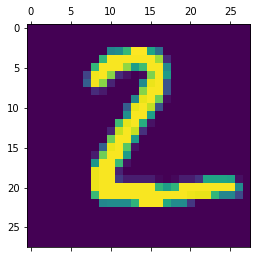

In [ ]:
# cross check

import matplotlib.pyplot as plt
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(XX_train, YY_train), (XX_test, YY_test) = mnist.load_data()

plt.matshow(XX_test[1])

In [ ]:
import numpy as np
np.argmax(y_predicted[1])

2

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


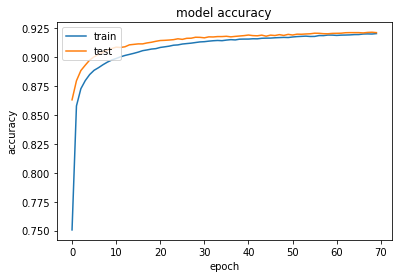

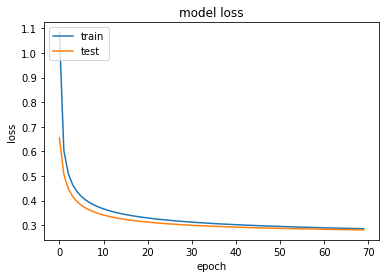

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_0.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[ 0.00955395, -0.01001571,  0.01971434, ..., -0.03216997,
          0.07416361, -0.00240698],
        [ 0.0428798 , -0.07244799,  0.04343046, ..., -0.01854801,
          0.07335586, -0.00418051],
        [-0.04501318, -0.03297648, -0.03283018, ..., -0.02268568,
         -0.07886226, -0.04662892],
        ...,
        [ 0.07658445, -0.08107509, -0.04220182, ...,  0.07574206,
          0.00027366,  0.00811788],
        [ 0.08417843, -0.02756839, -0.054338  , ...,  0.05196504,
          0.07492559, -0.02085561],
        [-0.04702992, -0.06004055, -0.01687165, ..., -0.07095753,
          0.06763422,  0.03598927]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.3378962 ,  0.35512528,  0.07361957, -0.2618507 ,  0.03776706,
         1.2823693 , -0.10222276,  0.64215785, -1.4310623 , -0.2580086 ],
       dtype=float32)>]

In [ ]:
#evaluate model

test_loss, test_acc = model_0.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.2826 - accuracy: 0.9222
Test loss: 0.28262633085250854
Test accuracy: 0.9222000241279602


# Perceptron First Run without changing any parameter

313/313 [==============================] - 0s 580us/step - loss: 0.2823 - accuracy: 0.9218

Test loss: 0.2823309004306793

Test accuracy: 0.9218000173568726

# Perceptron Second Run without changing any parameter

313/313 [==============================] - 0s 576us/step - loss: 0.2822 - accuracy: 0.9214
        
Test loss: 0.28220921754837036
    
Test accuracy: 0.9214000105857849

# Perceptron Third Run without changing any parameter

313/313 [==============================] - 0s 602us/step - loss: 0.2830 - accuracy: 0.9213

Test loss: 0.28296253085136414
    
Test accuracy: 0.9212999939918518



## Ans to Q1

We do not get the exact same results if we run the Notebook multiple times without changing
any parameters

# End of Q1 - end of model_0

## Q2: What is the effect of adding more neurons to each Conv2D layer?

# CNN Model - model_1

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Loading MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# For applying neural network, we need to have a vector of 28x28 pixels for eaxh image.

X_train = X_train.reshape(60000, 28,28,1) 
X_test = X_test.reshape(10000, 28,28,1)

# One-hot encoding of the labels.
y_train_one_hot = tf.keras.utils.to_categorical(y_train) 
y_test_one_hot = tf.keras.utils.to_categorical(y_test)


In [ ]:
# Build CNN Model
model_1 = Sequential()

In [ ]:
# add first layer
model_1.add(keras.layers.Conv2D(64,kernel_size=3, input_shape=(28,28,1), activation='relu'))

# add another layer
model_1.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))


model_1.add(keras.layers.Flatten())

# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer', activation = 'softmax')) 

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense_layer (Dense)          (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model

model_1.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model

#training = model_1.fit(X_train, y_train_one_hot, batch_size=64, epochs=5, validation_split=0.2) 

training = model_1.fit(X_train, y_train_one_hot, epochs=3, validation_split=0.2) 


Epoch 1/3
1500/1500 [==============================] - 69s 46ms/step - loss: 0.3006 - accuracy: 0.9416 - val_loss: 0.0997 - val_accuracy: 0.9722
Epoch 2/3
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0835 - accuracy: 0.9739 - val_loss: 0.1143 - val_accuracy: 0.9733
Epoch 3/3
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0575 - accuracy: 0.9812 - val_loss: 0.0943 - val_accuracy: 0.9734


In [ ]:
# predict

y_predicted = model_1.predict(X_test)
y_predicted

array([[5.17545047e-08, 1.91457505e-12, 1.44386025e-09, ...,
        1.00000000e+00, 3.88718320e-08, 9.12575127e-10],
       [1.00706573e-04, 4.23024976e-05, 9.99810278e-01, ...,
        1.37000619e-10, 8.41867092e-08, 3.89346244e-09],
       [1.22737601e-05, 9.94948268e-01, 9.75500327e-04, ...,
        2.18667310e-06, 4.04099672e-04, 3.84398135e-07],
       ...,
       [1.15509954e-11, 6.49957302e-12, 2.01460701e-12, ...,
        3.36003666e-07, 2.68139411e-06, 4.93845334e-07],
       [1.26320356e-05, 5.06968287e-11, 6.23818719e-10, ...,
        5.87576077e-09, 6.09675329e-03, 3.76410571e-06],
       [2.15794847e-04, 5.77737524e-14, 6.18774543e-09, ...,
        1.05989495e-10, 5.46027081e-07, 1.77222219e-07]], dtype=float32)

In [ ]:
XX_test = X_test.reshape(10000,28*28)
XX_test.shape

(10000, 784)

In [ ]:
#plt.matshow(XX_test[0])

In [ ]:
np.argmax(y_predicted[1])

2

In [ ]:
model_1.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 64) dtype=float32, numpy=
 array([[[[ 1.60317328e-02, -2.05157816e-01,  3.06320935e-02,
           -1.41363768e-02, -3.29564735e-02, -5.72400726e-02,
            2.66142283e-02, -8.20610300e-02,  4.02868316e-02,
           -8.38366896e-02,  4.28532287e-02, -7.43114725e-02,
            2.09911130e-02, -3.18673961e-02, -2.96401344e-02,
           -1.28607731e-03, -3.53742950e-02, -4.58025932e-02,
           -4.02537175e-02,  4.14936896e-03, -1.00088879e-01,
           -1.42270243e-02, -1.20149506e-02, -9.09715742e-02,
           -1.08917713e-01,  2.78532114e-02, -8.02420899e-02,
            2.13555805e-03, -1.28599897e-01, -2.04435680e-02,
           -1.20839896e-02, -7.58697838e-02, -3.50585952e-02,
            5.36646647e-03,  2.63651256e-02, -3.39019150e-02,
           -3.65305170e-02, -6.17796443e-02, -8.09330493e-02,
            1.84068214e-02, -3.64353843e-02,  3.65493558e-02,
           -1.06118970e-01, -8.48099031e-03, -1.25915408e-

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


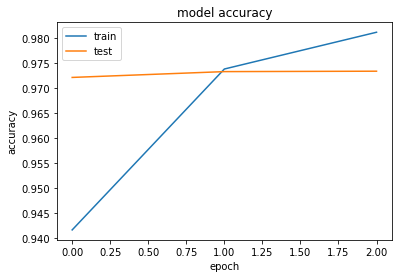

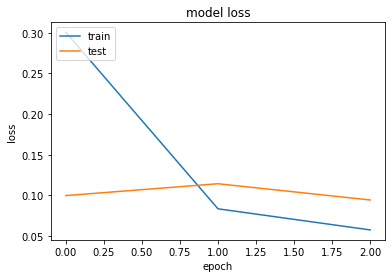

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate model

#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, y_test_one_hot)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 8ms/step - loss: 0.0971 - accuracy: 0.9730

Test Loss 0.0971444845199585

Test accuracy: 0.9729999899864197


# End of model_1

## If we add more neurons to each Conv2D layer, let's see what happens.. 

# build another CNN model_1a

In [ ]:

# Build another CNN Model (kernel_size = 7)
model_1a = Sequential()

model_1a.add(keras.layers.Conv2D(32, (7, 7), padding="same", input_shape=(28,28,1), activation="relu"))
#model_1a.add(MaxPooling2D(pool_size=(2, 2)))

model_1a.add(keras.layers.Conv2D(16, (7, 7), padding="same", activation="relu"))
#model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1a.add(keras.layers.Conv2D(8, (7, 7), padding="same", activation="relu"))
#model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1a.add(keras.layers.Flatten())
model_1a.add(Dense(10, name='dense_layer', activation = 'softmax')) 

model_1a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        1600      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        25104     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         6280      
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_layer (Dense)          (None, 10)                62730     
Total params: 95,714
Trainable params: 95,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model

model_1a.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model

#training = model_1.fit(X_train, y_train_one_hot, batch_size=64, epochs=5, validation_split=0.2) 

training = model_1a.fit(X_train, y_train_one_hot, epochs=3, validation_split=0.2) 

Epoch 1/3
1500/1500 [==============================] - 199s 133ms/step - loss: 0.2105 - accuracy: 0.9380 - val_loss: 0.1049 - val_accuracy: 0.9698
Epoch 2/3
1500/1500 [==============================] - 212s 141ms/step - loss: 0.1004 - accuracy: 0.9704 - val_loss: 0.0910 - val_accuracy: 0.9728
Epoch 3/3
1500/1500 [==============================] - 215s 144ms/step - loss: 0.0786 - accuracy: 0.9763 - val_loss: 0.0807 - val_accuracy: 0.9751


In [ ]:
model_1a.weights

[<tf.Variable 'conv2d_2/kernel:0' shape=(7, 7, 1, 32) dtype=float32, numpy=
 array([[[[-0.0540033 , -0.07426727, -0.07739285, ...,  0.0150011 ,
            0.06022884, -0.08667406]],
 
         [[ 0.00669112, -0.07060144, -0.09664703, ..., -0.01224386,
            0.03506973, -0.04245025]],
 
         [[ 0.08329154, -0.0157468 ,  0.03706214, ...,  0.00636818,
            0.03407385,  0.00251925]],
 
         ...,
 
         [[ 0.0098206 , -0.05071283,  0.08352337, ..., -0.00315555,
           -0.01297418, -0.03283694]],
 
         [[ 0.00067713,  0.01255252,  0.00745787, ..., -0.06144689,
           -0.02311607, -0.05823047]],
 
         [[-0.05950141, -0.08707935, -0.24412534, ..., -0.18506402,
           -0.03644436, -0.11384033]]],
 
 
        [[[-0.07131184, -0.07666721, -0.01269637, ..., -0.01250497,
           -0.01807271, -0.13570057]],
 
         [[-0.11187128, -0.03687834,  0.00863627, ...,  0.0039726 ,
            0.05529103, -0.02719293]],
 
         [[-0.10082136, -0.041776

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


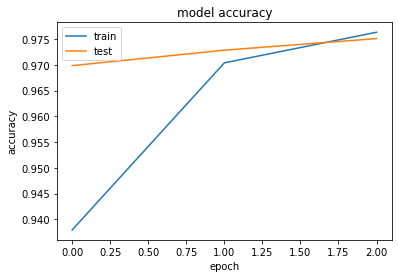

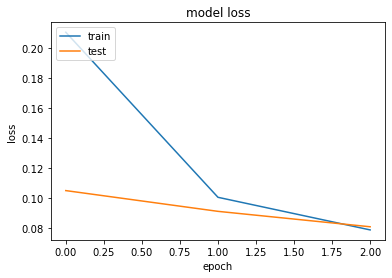

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate model

#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, y_test_one_hot)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.0971 - accuracy: 0.9730

Test Loss 0.0971444845199585

Test accuracy: 0.9729999899864197


Compare:

Test Loss 0.0971444845199585

Test accuracy: 0.9729999899864197

# End of CNN model_1a

# Start of multilayered model_2

# Adding Hidden Layers in Multi Layered Perceptron

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns


# Loading MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# For applying neural network, we need to have a vector of 28x28 pixels for eaxh image.

X_train = X_train.reshape(60000, 28*28) 
X_test = X_test.reshape(10000, 28*28) 


In [ ]:
# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 


In [ ]:
# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255

In [ ]:
# One-hot encoding of the labels.
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
# Build model

model_2 = Sequential()



In [ ]:
# Most common type of model is a stack of layers. Depends on the problem, but typically 1-5

N_hidden = 64 # Neurons per Hidden Layer

# Adds the first densely-connected layer with 64 Neurons to the model:
# Activation must be 'relu' as this is a hidden layer
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)


# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, one doesn't need to specify the size of the input anymore: It automatically figures out.

# Add an output layer with 10 output units (10 different classes):
# Output Activation must be 'softmax' or 'sigmoid'
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax')) 
# 10 was used as in the Perceptron with no hidden layer (model_0)

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 64)                50240     
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                4160      
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Let's explore the effect of adding a hidden layer on accuracy

In [ ]:
# Compile model

model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model reduced epochs (to save computing time)

training = model_2.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.2) 


Epoch 1/20
750/750 [==============================] - 1s 1ms/step - loss: 1.1600 - accuracy: 0.6804 - val_loss: 0.4939 - val_accuracy: 0.8689
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.4327 - accuracy: 0.8787 - val_loss: 0.3482 - val_accuracy: 0.9003
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.3475 - accuracy: 0.9013 - val_loss: 0.3042 - val_accuracy: 0.9118
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.3097 - accuracy: 0.9113 - val_loss: 0.2778 - val_accuracy: 0.9190
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2845 - accuracy: 0.9186 - val_loss: 0.2592 - val_accuracy: 0.9245
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2647 - accuracy: 0.9248 - val_loss: 0.2448 - val_accuracy: 0.9285
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.2482 - accuracy: 0.9291 - val_loss: 0.2307 - val_accuracy: 0.9349
Epoch 

In [ ]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.04602988,  0.02437742,  0.05937489, ...,  0.0816026 ,
          0.07055391,  0.02326956],
        [ 0.07848058,  0.06525942, -0.0158834 , ...,  0.06957314,
          0.0778758 ,  0.04669727],
        [ 0.04528954, -0.01075678,  0.05909603, ..., -0.07778867,
          0.07095148, -0.01853234],
        ...,
        [-0.04626771, -0.07345352, -0.02377181, ..., -0.02897466,
         -0.066262  ,  0.06244477],
        [ 0.05238914, -0.05673739, -0.00118038, ...,  0.05330796,
          0.03260345, -0.05615484],
        [ 0.02280486, -0.02295965,  0.01920937, ...,  0.07339878,
         -0.02023426,  0.06183095]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.07344133,  0.05143248,  0.01034605,  0.00636844,  0.04703155,
         0.1313989 ,  0.03249414,  0.02154386,  0.04431835,  0.02995684,
         0.02922306,  0.01613666,  0.0367007 ,  0.00926442,  0.0247

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


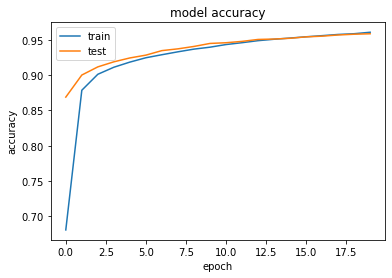

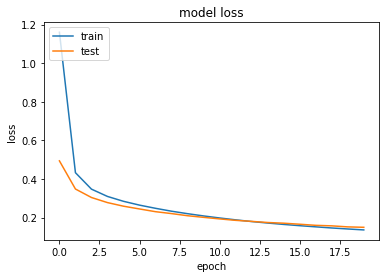

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate model

#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)


313/313 [==============================] - 0s 741us/step - loss: 0.1408 - accuracy: 0.9579

Test Loss 0.14084218442440033

Test accuracy: 0.9578999876976013


# Without hidden layers

Test loss: 0.2820744216442108

Test accuracy: 0.9212999939918518

# Comment much improvement in accuracy with hidden layers

# End of model_2

# Start here on 26 November 2020

In [ ]:
# Start here on 26 November 2020

# Start of model_3 (Dropout = 30%)

### What happens if we manipulate the value of Dropout?

#### model_3      Adding Dropout to Avoid Overfitting

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns



In [ ]:
# Build model

model_3 = Sequential()



In [ ]:
#Most common type of model is a stack of layers
# model_3 TWO HIDDEN LAYERS

N_hidden = 128 # Neurons per Hidden Layer
# Adds a densely-connected layer with 128 units to the model:

model_3.add(Dense(N_hidden, name='dense_layer_1', input_shape=(784,), activation = 'relu'))
model_3.add(Dropout(0.3))

# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, one doesn't need to specify the size of the input anymore.
model_3.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model

model_3.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train model
# batch of 64 neurons in output
training = model_3.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.2) 


Epoch 1/20
750/750 [==============================] - 1s 2ms/step - loss: 1.3432 - accuracy: 0.5702 - val_loss: 0.5562 - val_accuracy: 0.8652
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.6582 - accuracy: 0.7957 - val_loss: 0.3748 - val_accuracy: 0.8982
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.5188 - accuracy: 0.8447 - val_loss: 0.3132 - val_accuracy: 0.9112
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.4494 - accuracy: 0.8665 - val_loss: 0.2809 - val_accuracy: 0.9186
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.4043 - accuracy: 0.8791 - val_loss: 0.2565 - val_accuracy: 0.9261
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.3668 - accuracy: 0.8915 - val_loss: 0.2391 - val_accuracy: 0.9303
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.3455 - accuracy: 0.8985 - val_loss: 0.2248 - val_accuracy: 0.9337
Epoch 

In [ ]:
model_3.weights

[<tf.Variable 'dense_layer_1/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.06067535, -0.00380543, -0.06214233, ...,  0.02157439,
          0.04195286,  0.04514501],
        [-0.04322236, -0.02869448,  0.02693823, ...,  0.06641083,
         -0.06718712,  0.03469784],
        [ 0.02805324, -0.06966808, -0.0723573 , ..., -0.03950828,
          0.06653681, -0.01418317],
        ...,
        [-0.07337616,  0.04855358, -0.06823213, ...,  0.06529918,
         -0.00096107, -0.05665167],
        [ 0.01130811,  0.00591951, -0.02681984, ...,  0.06051066,
         -0.05141363, -0.00429247],
        [-0.02080136, -0.01887209,  0.03213587, ...,  0.07146061,
         -0.02785189,  0.04117505]], dtype=float32)>,
 <tf.Variable 'dense_layer_1/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 8.93884152e-02, -3.67563628e-02, -2.50535700e-02,  2.59417910e-02,
         4.41627093e-02,  5.77833168e-02, -2.77534723e-02,  2.33603157e-02,
         7.70248249e-02, -7.01731630e-03, -2.58030407e-

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


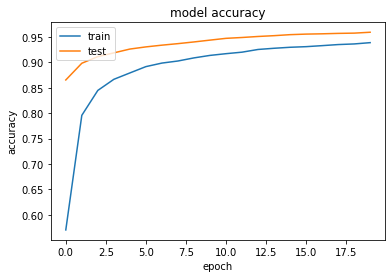

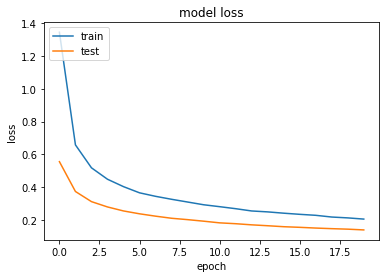

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate model

#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)


313/313 [==============================] - 0s 756us/step - loss: 0.1371 - accuracy: 0.9584

Test Loss 0.13714036345481873

Test accuracy: 0.9584000110626221


By increasing epochs with dropouts, accuracy can sure be enhanced. Like:

Test Loss 0.08947619050741196

Test accuracy: 0.9736999869346619

The term “dropout” refers to dropping out units (both hidden and visible) in a neural network.

Training Phase:
Training Phase: For each hidden layer, for each training sample, for each iteration, ignore (zero out) a random fraction, p, of nodes (and corresponding activations).

Testing Phase:
Use all activations, but reduce them by a factor p (to account for the missing activations during training).

# end of model_3 (Dropout = 30%)

# start of model_3a (Dropout=35%)

Now, let us change dropout %. Say, we increase that to 35%.



In [ ]:
# Build model

model_3a = Sequential()

In [ ]:
N_hidden = 128 # Neurons per Hidden Layer
# Adds a densely-connected layer with 128 units to the model:

# we wish to reduce neurons as we go deeper

model_3a.add(Dense(128, name='dense_layer_1', input_shape=(784,), activation = 'relu'))
model_3a.add(Dropout(0.35))

# Adding another dense layer: reduce neurons
model_3a.add(Dense(64, name='dense_layer_2', activation='relu'))
# After the first layer, one doesn't need to specify the size of the input anymore.
model_3a.add(Dropout(0.35))

# Add an output layer with 10 output units (10 different classes):
model_3a.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compile model

model_3a.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train model, increasing batch size to 98, reducing epochs to 20 (reduce computing time loss)
# -------------------------------------------------------------------------------------------

training = model_3a.fit(X_train, y_train, batch_size=98, epochs=20, validation_split=0.2) 



Epoch 1/20
490/490 [==============================] - 1s 2ms/step - loss: 1.6319 - accuracy: 0.4633 - val_loss: 0.8023 - val_accuracy: 0.8313
Epoch 2/20
490/490 [==============================] - 1s 2ms/step - loss: 0.9179 - accuracy: 0.7100 - val_loss: 0.5001 - val_accuracy: 0.8754
Epoch 3/20
490/490 [==============================] - 1s 2ms/step - loss: 0.7100 - accuracy: 0.7807 - val_loss: 0.4032 - val_accuracy: 0.8933
Epoch 4/20
490/490 [==============================] - 1s 2ms/step - loss: 0.6098 - accuracy: 0.8162 - val_loss: 0.3539 - val_accuracy: 0.9020
Epoch 5/20
490/490 [==============================] - 1s 2ms/step - loss: 0.5514 - accuracy: 0.8335 - val_loss: 0.3248 - val_accuracy: 0.9105
Epoch 6/20
490/490 [==============================] - 1s 2ms/step - loss: 0.5045 - accuracy: 0.8499 - val_loss: 0.2999 - val_accuracy: 0.9153
Epoch 7/20
490/490 [==============================] - 1s 2ms/step - loss: 0.4772 - accuracy: 0.8584 - val_loss: 0.2847 - val_accuracy: 0.9188
Epoch 

In [ ]:
model_3a.weights

[<tf.Variable 'dense_layer_1/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.02404124,  0.04161987, -0.00496086, ..., -0.06643091,
          0.01198242, -0.02913174],
        [ 0.0165764 ,  0.0698762 , -0.07173432, ...,  0.05205911,
          0.06466436,  0.0537767 ],
        [-0.01040317,  0.0542303 ,  0.02003713, ...,  0.02211828,
         -0.07084484,  0.03661531],
        ...,
        [ 0.02545427, -0.05430732,  0.04526807, ...,  0.02725939,
         -0.02245795,  0.07022319],
        [-0.07071772, -0.05455431, -0.0446053 , ..., -0.07359548,
          0.06757826, -0.07254626],
        [-0.06347579, -0.0689771 , -0.01531547, ...,  0.06054171,
         -0.04043281,  0.04863863]], dtype=float32)>,
 <tf.Variable 'dense_layer_1/bias:0' shape=(128,) dtype=float32, numpy=
 array([-2.69831624e-02,  5.94095560e-03, -8.97060111e-02, -1.57183036e-02,
         5.06228991e-02, -2.58172378e-02, -9.32480861e-03,  9.13301203e-03,
         6.12868741e-02, -7.49653727e-02, -2.91859009e-

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


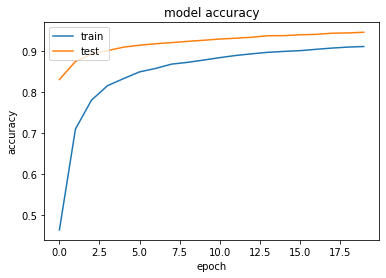

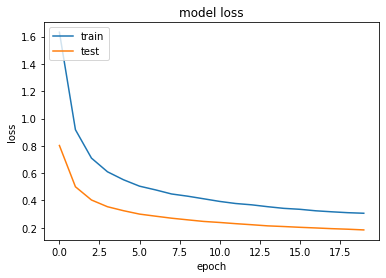

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate model

#evaluate the model
test_loss, test_acc = model_3a.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 748us/step - loss: 0.1835 - accuracy: 0.9465

Test Loss 0.1834847331047058

Test accuracy: 0.9465000033378601


By dropping 35%, Loss has increased & accuracy has decreased

# end of model_3a (Dropout = 35%)

# start of model_3b (Dropout = 25%)

Let's try 25%

In [ ]:
# Build model

model_3b = Sequential()

In [ ]:
N_hidden = 128 # Neurons per Hidden Layer
# Adds a densely-connected layer with 128 units to the model:

model_3b.add(Dense(128, name='dense_layer_1', input_shape=(784,), activation = 'relu'))
model_3b.add(Dropout(0.25))

# Adding another dense layer:
model_3b.add(Dense(64, name='dense_layer_2', activation='relu'))
# After the first layer, one doesn't need to specify the size of the input anymore.
model_3b.add(Dropout(0.25))

# Add an output layer with 10 output units (10 different classes):
model_3b.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [ ]:
# Compile model

model_3b.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model

training = model_3b.fit(X_train, y_train, batch_size=98, epochs=20, validation_split=0.2) 



Epoch 1/20
490/490 [==============================] - 1s 2ms/step - loss: 1.5440 - accuracy: 0.5137 - val_loss: 0.6912 - val_accuracy: 0.8456
Epoch 2/20
490/490 [==============================] - 1s 2ms/step - loss: 0.7674 - accuracy: 0.7674 - val_loss: 0.4453 - val_accuracy: 0.8842
Epoch 3/20
490/490 [==============================] - 1s 2ms/step - loss: 0.6015 - accuracy: 0.8179 - val_loss: 0.3692 - val_accuracy: 0.8979
Epoch 4/20
490/490 [==============================] - 1s 2ms/step - loss: 0.5214 - accuracy: 0.8444 - val_loss: 0.3284 - val_accuracy: 0.9080
Epoch 5/20
490/490 [==============================] - 1s 2ms/step - loss: 0.4773 - accuracy: 0.8586 - val_loss: 0.3023 - val_accuracy: 0.9137
Epoch 6/20
490/490 [==============================] - 1s 2ms/step - loss: 0.4369 - accuracy: 0.8715 - val_loss: 0.2808 - val_accuracy: 0.9187
Epoch 7/20
490/490 [==============================] - 1s 2ms/step - loss: 0.4120 - accuracy: 0.8803 - val_loss: 0.2646 - val_accuracy: 0.9233
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


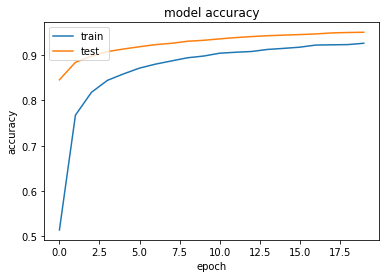

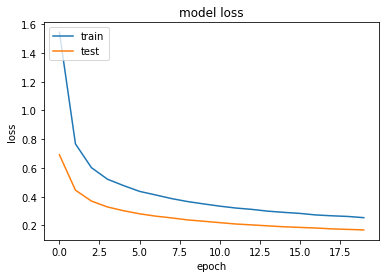

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate model

#evaluate the model
test_loss, test_acc = model_3b.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 774us/step - loss: 0.1674 - accuracy: 0.9502

Test Loss 0.1674097180366516

Test accuracy: 0.9502000212669373


Now, loss has increased and accuracy also incrreased.

Compare:
Test Loss 0.1834847331047058

Test accuracy: 0.9465000033378601

# end of model_3b (Dropout=25%)

# start of model_4 (more hidden layers)

### What is the effect of adding more hidden layers to the network?

Num Hidden Layers	Result:

Problems that require more than two hidden layers were rare prior to deep learning. Two or fewer layers will often suffice with simple data sets. However, with complex datasets involving time-series or computer vision, additional layers can be helpful. The following table summarizes the capabilities of several common layer architectures.
    
none	Only capable of representing linear separable functions or decisions.

1	Can approximate any function that contains a continuous mapping from one finite space to another.

2	Can represent an arbitrary decision boundary to arbitrary accuracy with rational activation functions and can approximate any smooth mapping to any accuracy.

2	Additional layers can learn complex representations (sort of automatic feature engineering) for layer layers.




#### Effect of number of   Neurons in Hidden Layers

There are rule-of-thumb methods for determining an acceptable number of neurons to use in the hidden layers, such as the following:

The number of hidden neurons should be between the size of the input layer and the size of the output layer.

The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.

The number of hidden neurons should be less than twice the size of the input layer.

In [ ]:
num_neurons_input_layer = 28*28
print(num_neurons_input_layer)
temp = (2/3)*764 
print(temp)

784
509.3333333333333


In [ ]:
num_neurons_output_layer = 10

number of hidden neurons can an arbitrary number between 10 and 784.

Or, (2/3)* 784 + 10 = approx 520

Too many neurons in hidden layers will lead to overfitting. So, I still stick to 128.

So, finally, let us add one more hidden layer than model_3b and let's call it model_4. 

And keep:

* 1st hidden layer: 512 neurons 


* 2nd hidden layer: 256 neurons


* 3rd hidden layere: 128 neurons


* and derpout = 25%

* let's recall model_0


* model_0.add(Dense(10, input_shape=(784,), name='dense_layer', activation='softmax')). This is the same as 'dense_layer_4 below.


* So, we are now subjecting the DNN to 3 hidden layers, each neurons per layer as above and using a dropout % = 0.25.


* There is no need to feed input shape to further hidden layers after the first hidden layer.


* Activation function of all hidden layers is 'relu'. We do not want to squeeze anything at such stages.


* Activation function of the output layer is 'softmax' as always (multiclass classification).


* Not changing epochs as we want to see effect of one more hidden layer.


* optimizer = 'adam'



### adding another hidden layer

## Alert! we are not keeping N_hidden to 512 considering the next question in this file

In [ ]:
# Build model

model_4 = Sequential()

In [ ]:
N_hidden = 512 # Neurons per Hidden Layer

model_4.add(Dense(512, name='dense_layer1', input_shape=(784,), activation = 'relu'))
model_4.add(Dropout(0.25))

# Adding another dense layer:
model_4.add(Dense(256, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.25))

# Adding another dense layer:
model_4.add(Dense(128, name='dense_layer_3', activation='relu'))
model_4.add(Dropout(0.25))

# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_4', activation = 'softmax'))




In [ ]:
# Compile model. optimizer = 'adam'
#---------------------------------
model_4.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model

training = model_4.fit(X_train, y_train, batch_size=98, epochs=20, validation_split=0.2) 



Epoch 1/20
490/490 [==============================] - 3s 6ms/step - loss: 0.3406 - accuracy: 0.8961 - val_loss: 0.1201 - val_accuracy: 0.9643
Epoch 2/20
490/490 [==============================] - 3s 5ms/step - loss: 0.1416 - accuracy: 0.9574 - val_loss: 0.0972 - val_accuracy: 0.9714
Epoch 3/20
490/490 [==============================] - 3s 6ms/step - loss: 0.1029 - accuracy: 0.9689 - val_loss: 0.0899 - val_accuracy: 0.9735
Epoch 4/20
490/490 [==============================] - 3s 6ms/step - loss: 0.0846 - accuracy: 0.9744 - val_loss: 0.0896 - val_accuracy: 0.9737
Epoch 5/20
490/490 [==============================] - 3s 5ms/step - loss: 0.0687 - accuracy: 0.9786 - val_loss: 0.0831 - val_accuracy: 0.9773
Epoch 6/20
490/490 [==============================] - 3s 6ms/step - loss: 0.0605 - accuracy: 0.9818 - val_loss: 0.0931 - val_accuracy: 0.9742
Epoch 7/20
490/490 [==============================] - 3s 6ms/step - loss: 0.0567 - accuracy: 0.9821 - val_loss: 0.0780 - val_accuracy: 0.9787
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


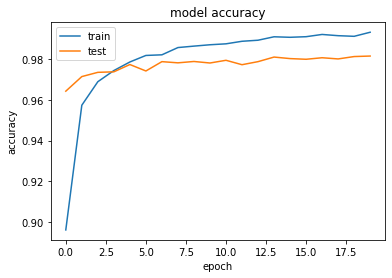

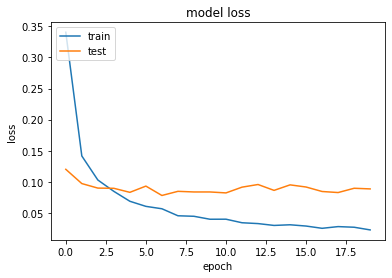

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_4.weights

[<tf.Variable 'dense_layer1/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.06576549, -0.06634066,  0.01077566, ..., -0.00765981,
          0.05361172, -0.01600409],
        [-0.01390494, -0.04383304, -0.01837154, ..., -0.05004091,
          0.03032525,  0.03133194],
        [ 0.05663465, -0.004302  ,  0.00367105, ...,  0.02663334,
          0.02762248, -0.05520336],
        ...,
        [ 0.06276137,  0.0514329 ,  0.04913054, ...,  0.06612602,
          0.00520979, -0.04632035],
        [-0.03238078,  0.01994085, -0.04974702, ..., -0.05005997,
         -0.01736503, -0.02636542],
        [-0.06278703,  0.02553095, -0.00082135, ..., -0.04930432,
          0.03874949, -0.01756439]], dtype=float32)>,
 <tf.Variable 'dense_layer1/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 1.42046837e-02,  1.42268213e-02,  4.84124050e-02, -8.30804333e-02,
        -3.68898027e-02, -6.44649714e-02,  1.56446807e-02,  3.52657959e-02,
        -9.30727944e-02,  7.43713155e-02, -2.28079185e-02

In [ ]:
#evaluate model

#evaluate the model
test_loss, test_acc = model_4.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)



313/313 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.9801

Test Loss 0.09103436768054962

Test accuracy: 0.9800999760627747


Let's compare this with model_3b

Test Loss 0.1674097180366516

Test accuracy: 0.9502000212669373

#### We observe that model_4 loss has increased but accuracy has also increased. 

However, at this stage, we move forward to next task


# end of model_4

# Note: There is no model 5 & 6

# start of model_7

### What is the accuracy score if we use RMSprop for model 4 above?

In [ ]:
# Build model

model_7 = Sequential()

### Alert! Using 3 hidden layers 

In [ ]:
N_hidden = 512 # Neurons per Hidden Layer

model_7.add(Dense(512, name='dense_layer1', input_shape=(784,), activation = 'relu'))
model_7.add(Dropout(0.25))

# Adding another dense layer:
model_7.add(Dense(256, name='dense_layer_2', activation='relu'))
model_7.add(Dropout(0.25))

# Adding another dense layer:
model_7.add(Dense(128, name='dense_layer_3', activation='relu'))
model_7.add(Dropout(0.25))

# Add an output layer with 10 output units (10 different classes):
model_7.add(Dense(10, name='dense_layer_4', activation = 'softmax'))




# RMSprop

* learning_rate: A Tensor, floating point value, or a schedule that is a tf.keras.optimizers.schedules.LearningRateSchedule, or a callable that takes no arguments and returns the actual value to use. The learning rate. Defaults to 0.001.


* rho: Discounting factor for the history/coming gradient. Defaults to 0.9.


* momentum: A scalar or a scalar Tensor. Defaults to 0.0.


* epsilon: A small constant for numerical stability. This epsilon is "epsilon hat" in the Kingma and Ba paper (in the formula just before Section 2.1), not the epsilon in Algorithm 1 of the paper. Defaults to 1e-7.


* centered: Boolean. If True, gradients are normalized by the estimated variance of the gradient; if False, by the uncentered second moment. Setting this to True may help with training, but is slightly more expensive in terms of computation and memory. Defaults to False.


* name: Optional name prefix for the operations created when applying gradients. Defaults to "RMSprop".


* **kwargs: Keyword arguments. Allowed to be one of "clipnorm" or "clipvalue". "clipnorm" (float) clips gradients by norm; "clipvalue" (float) clips gradients by value.

In [ ]:
# opt = keras.optimizers.RMSprop()

opt = keras.optimizers.RMSprop(lr=0.01, rho=0.9) # lr keeping higher to test


In [ ]:
# Compile model with RMSprop optimizer

model_7.compile(optimizer= opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model

training = model_7.fit(X_train, y_train, batch_size=98, epochs=20, validation_split=0.2) 




Epoch 1/20
490/490 [==============================] - 4s 8ms/step - loss: 0.6389 - accuracy: 0.8459 - val_loss: 0.2910 - val_accuracy: 0.9252
Epoch 2/20
490/490 [==============================] - 4s 8ms/step - loss: 0.4249 - accuracy: 0.9099 - val_loss: 0.2661 - val_accuracy: 0.9449
Epoch 3/20
490/490 [==============================] - 4s 8ms/step - loss: 0.4631 - accuracy: 0.9120 - val_loss: 0.2296 - val_accuracy: 0.9427
Epoch 4/20
490/490 [==============================] - 4s 8ms/step - loss: 0.5079 - accuracy: 0.9119 - val_loss: 0.3264 - val_accuracy: 0.9546
Epoch 5/20
490/490 [==============================] - 4s 8ms/step - loss: 0.4999 - accuracy: 0.9134 - val_loss: 0.3008 - val_accuracy: 0.9578
Epoch 6/20
490/490 [==============================] - 4s 8ms/step - loss: 0.5095 - accuracy: 0.9156 - val_loss: 0.3059 - val_accuracy: 0.9353
Epoch 7/20
490/490 [==============================] - 4s 9ms/step - loss: 0.5724 - accuracy: 0.9107 - val_loss: 0.4093 - val_accuracy: 0.9497
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


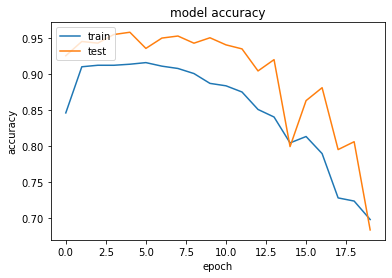

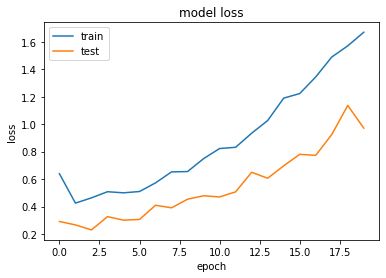

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### accuracy is decreasing after epoch 9

In [ ]:
model_7.weights

[<tf.Variable 'dense_layer1/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.03883603,  0.01690776,  0.0073985 , ..., -0.00622882,
         -0.0638966 , -0.03492773],
        [-0.04498775, -0.04744402,  0.06312975, ...,  0.03163497,
         -0.06504241,  0.01396795],
        [-0.0236189 ,  0.01847555, -0.02435064, ...,  0.00618066,
         -0.02287203, -0.01031563],
        ...,
        [ 0.01045354,  0.05107086,  0.00291733, ..., -0.057116  ,
         -0.04017382,  0.02741534],
        [-0.02634649,  0.05369877, -0.05876906, ...,  0.04687462,
          0.01683198,  0.0530329 ],
        [ 0.01639901, -0.0346297 ,  0.00173654, ...,  0.0648998 ,
          0.05791479, -0.05046773]], dtype=float32)>,
 <tf.Variable 'dense_layer1/bias:0' shape=(512,) dtype=float32, numpy=
 array([-3.16070914e-02, -4.59911451e-02, -7.30986521e-02, -8.00008327e-02,
        -3.16051953e-02, -6.21204749e-02, -6.29092380e-03, -6.15785718e-02,
        -3.16218920e-02, -3.16209011e-02, -2.89212186e-02

In [ ]:
#evaluate model

#evaluate the model
test_loss, test_acc = model_7.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 1.0271 - accuracy: 0.6730

Test Loss 1.0270614624023438

Test accuracy: 0.6729999780654907


poor performance


opt = keras.optimizers.RMSprop(lr=0.01, rho=0.9)

# end of model_7

## Does manipulating the learning rate affect the model? Justify your answer.

## repeating model_7 with lower lr=0.001

In [ ]:
# opt = keras.optimizers.RMSprop()

opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9) # lr keeping higher to test


In [ ]:
# Compile model with RMSprop optimizer

model_7.compile(optimizer= opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model

training = model_7.fit(X_train, y_train, batch_size=98, epochs=20, validation_split=0.2) 


Epoch 1/20
490/490 [==============================] - 4s 8ms/step - loss: 1.3226 - accuracy: 0.7217 - val_loss: 0.9035 - val_accuracy: 0.8315
Epoch 2/20
490/490 [==============================] - 4s 8ms/step - loss: 1.1767 - accuracy: 0.7819 - val_loss: 1.0563 - val_accuracy: 0.8581
Epoch 3/20
490/490 [==============================] - 4s 8ms/step - loss: 1.2372 - accuracy: 0.7881 - val_loss: 0.9036 - val_accuracy: 0.8612
Epoch 4/20
490/490 [==============================] - 4s 8ms/step - loss: 1.1078 - accuracy: 0.8014 - val_loss: 0.9324 - val_accuracy: 0.8747
Epoch 5/20
490/490 [==============================] - 4s 9ms/step - loss: 1.0517 - accuracy: 0.8059 - val_loss: 1.0219 - val_accuracy: 0.8702
Epoch 6/20
490/490 [==============================] - 4s 9ms/step - loss: 1.1071 - accuracy: 0.8067 - val_loss: 1.0798 - val_accuracy: 0.8807
Epoch 7/20
490/490 [==============================] - 4s 9ms/step - loss: 1.0030 - accuracy: 0.8111 - val_loss: 1.0360 - val_accuracy: 0.8924
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


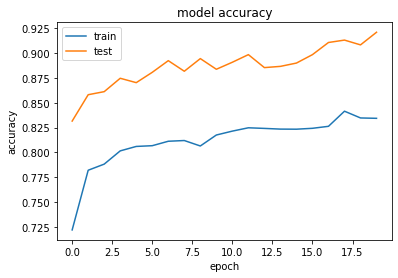

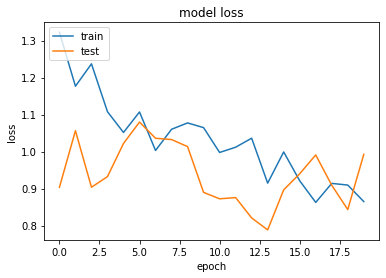

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate model

#evaluate the model
test_loss, test_acc = model_7.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.6741 - accuracy: 0.9225

Test Loss 0.6740783452987671

Test accuracy: 0.9225000143051147


# poor results but better than lr=0.01. RMSprop not giving good results

# start of final model_08

* Using 3 dense hidden layers


* 512 neurons per hidden layer


* Dropout = 0.30


* batch_size = 98


* epochs = 70


* optimizer = 'adam'


* validation_split = 0.20



## Building the complete model_8 from start

In [ ]:
#import libraries
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Loading MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [ ]:
# For applying neural network, we need to have a vector of 28x28 pixels for eaxh image.

X_train = X_train.reshape(60000, 28*28) 
X_test = X_test.reshape(10000, 28*28) 


In [ ]:
# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [ ]:
# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255

In [ ]:
# One-hot encoding of the labels.
y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Build model

model_8 = Sequential()

In [ ]:
N_hidden = 512 # Neurons per Hidden Layer

model_8.add(Dense(N_hidden, name='dense_layer1', input_shape=(784,), activation = 'relu'))
model_8.add(Dropout(0.30))

# Adding another dense layer:
model_8.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_8.add(Dropout(0.30))

# Adding another dense layer:
model_8.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_8.add(Dropout(0.30))

# Add an output layer with 10 output units (10 different classes):
model_8.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [ ]:
# Compile model with RMSprop optimizer

model_8.compile(optimizer= 'adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model

training = model_8.fit(X_train, y_train, batch_size=98, epochs=70, validation_split=0.2) 


Epoch 1/70
490/490 [==============================] - 5s 10ms/step - loss: 0.3120 - accuracy: 0.9042 - val_loss: 0.1295 - val_accuracy: 0.9603
Epoch 2/70
490/490 [==============================] - 5s 10ms/step - loss: 0.1364 - accuracy: 0.9588 - val_loss: 0.1060 - val_accuracy: 0.9682
Epoch 3/70
490/490 [==============================] - 5s 10ms/step - loss: 0.1029 - accuracy: 0.9686 - val_loss: 0.0966 - val_accuracy: 0.9704
Epoch 4/70
490/490 [==============================] - 5s 10ms/step - loss: 0.0863 - accuracy: 0.9734 - val_loss: 0.0888 - val_accuracy: 0.9753
Epoch 5/70
490/490 [==============================] - 5s 11ms/step - loss: 0.0726 - accuracy: 0.9771 - val_loss: 0.0830 - val_accuracy: 0.9770
Epoch 6/70
490/490 [==============================] - 6s 12ms/step - loss: 0.0695 - accuracy: 0.9778 - val_loss: 0.0909 - val_accuracy: 0.9736
Epoch 7/70
490/490 [==============================] - 6s 13ms/step - loss: 0.0595 - accuracy: 0.9810 - val_loss: 0.0835 - val_accuracy: 0.9772

In [ ]:
model_8.weights  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

[<tf.Variable 'dense_layer1/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.06533212,  0.02674094,  0.05048817, ...,  0.0379198 ,
         -0.05446516,  0.00181361],
        [-0.05768349,  0.00636778,  0.04231115, ..., -0.05910142,
          0.02949332,  0.02544784],
        [-0.04972396, -0.01753019,  0.02686614, ...,  0.05213293,
         -0.06602971, -0.05779088],
        ...,
        [ 0.00362376,  0.04811893,  0.02636006, ...,  0.01148849,
         -0.00232122, -0.01943912],
        [ 0.03688093, -0.05755736,  0.05515691, ..., -0.04464807,
         -0.03726123, -0.02244854],
        [-0.03347848, -0.01835098,  0.03147984, ...,  0.0593963 ,
          0.01557579, -0.04711287]], dtype=float32)>,
 <tf.Variable 'dense_layer1/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.08323897, -0.07701412, -0.1337801 , -0.0029981 ,  0.04412859,
        -0.2672084 , -0.17108804, -0.00842364, -0.05773789, -0.11230636,
        -0.02221691, -0.03495584, -0.08232322,  0.01131653, -0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


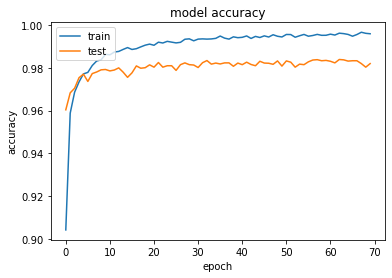

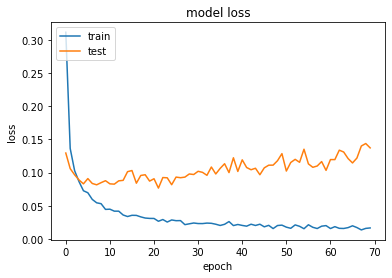

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate model

#evaluate the model
test_loss, test_acc = model_8.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.9836

Test Loss 0.11921540647745132

Test accuracy: 0.9836000204086304


# end of model_8

## What is the best parameter configuration for this project?

N_hidden = 256, SGD

Test Loss 0.08487128466367722

Test accuracy: 0.9740999937057495

### trials done below

###############################

N_hidden = 256, adam

Test Loss 0.09164461493492126

Test accuracy: 0.9811999797821045
#################################

N_hidden = 256, SGD

Test Loss 0.08487128466367722

Test accuracy: 0.9740999937057495
##################################

N_hidden = 512, SGD

Test Loss 0.07390360534191132

Test accuracy: 0.9761999845504761

####################################

In [ ]:
# Build model

model_9 = Sequential()

In [ ]:
N_hidden = 512 # Neurons per Hidden Layer

model_9.add(Dense(N_hidden, name='dense_layer1', input_shape=(784,), activation = 'relu'))
model_9.add(Dropout(0.30))

# Adding another dense layer:
model_9.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_9.add(Dropout(0.30))

# Adding another dense layer:
model_9.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_9.add(Dropout(0.30))

# Add an output layer with 10 output units (10 different classes):
model_9.add(Dense(10, name='dense_layer_4', activation = 'softmax'))

In [ ]:
# Compile model with RMSprop optimizer

model_9.compile(optimizer= 'SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model

training = model_9.fit(X_train, y_train, batch_size=64, epochs=35, validation_split=0.2) 


Epoch 1/35
750/750 [==============================] - 6s 7ms/step - loss: 1.1991 - accuracy: 0.6318 - val_loss: 0.4292 - val_accuracy: 0.8765
Epoch 2/35
750/750 [==============================] - 5s 7ms/step - loss: 0.5144 - accuracy: 0.8444 - val_loss: 0.3050 - val_accuracy: 0.9112
Epoch 3/35
750/750 [==============================] - 5s 7ms/step - loss: 0.4045 - accuracy: 0.8806 - val_loss: 0.2563 - val_accuracy: 0.9222
Epoch 4/35
750/750 [==============================] - 6s 7ms/step - loss: 0.3473 - accuracy: 0.8974 - val_loss: 0.2280 - val_accuracy: 0.9312
Epoch 5/35
750/750 [==============================] - 6s 8ms/step - loss: 0.3065 - accuracy: 0.9101 - val_loss: 0.2036 - val_accuracy: 0.9384
Epoch 6/35
750/750 [==============================] - 6s 9ms/step - loss: 0.2733 - accuracy: 0.9189 - val_loss: 0.1849 - val_accuracy: 0.9448
Epoch 7/35
750/750 [==============================] - 6s 9ms/step - loss: 0.2491 - accuracy: 0.9264 - val_loss: 0.1713 - val_accuracy: 0.9485
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


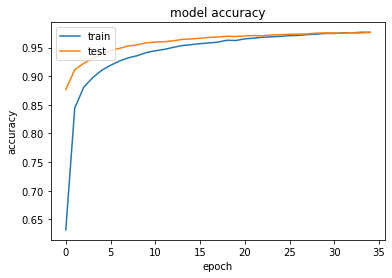

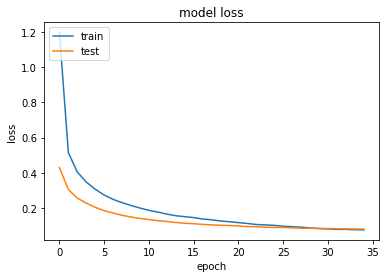

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate model

#evaluate the model
test_loss, test_acc = model_9.evaluate(X_test, y_test)
print()
print('Test Loss', test_loss)
print()
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.9762

Test Loss 0.07390360534191132

Test accuracy: 0.9761999845504761


N_hidden = 256, adam

Test Loss 0.09164461493492126

Test accuracy: 0.9811999797821045

N_hidden = 256, SGD

Test Loss 0.08487128466367722

Test accuracy: 0.9740999937057495

N_hidden = 512, SGD

Test Loss 0.07390360534191132

Test accuracy: 0.9761999845504761